Dataset Shape: (4463, 7)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4463 entries, 2002-08-12 to 2021-09-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4463 non-null   float64
 1   High          4463 non-null   float64
 2   Low           4463 non-null   float64
 3   Close         4463 non-null   float64
 4   Volume        4463 non-null   int64  
 5   Dividends     4463 non-null   float64
 6   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 278.9 KB
None

First 5 rows:
                 Open       High        Low      Close  Volume  Dividends  \
Date                                                                        
2002-08-12  28.794172  29.742206  28.794172  29.519140  212976        0.0   
2002-08-13  29.556316  30.030333  28.905705  29.119476  153576        0.0   
2002-08-14  29.184536  29.184536  26.563503  27.111877  822776

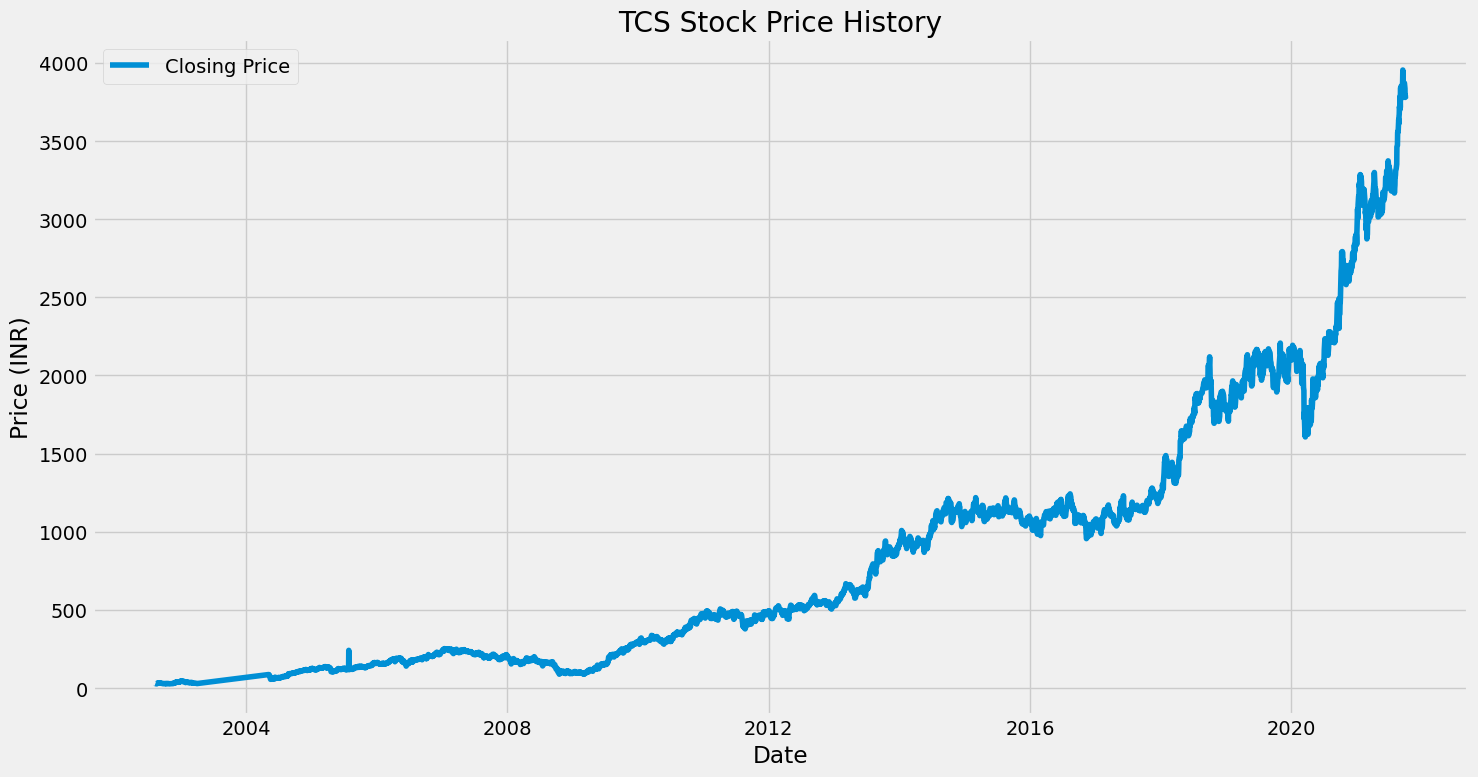

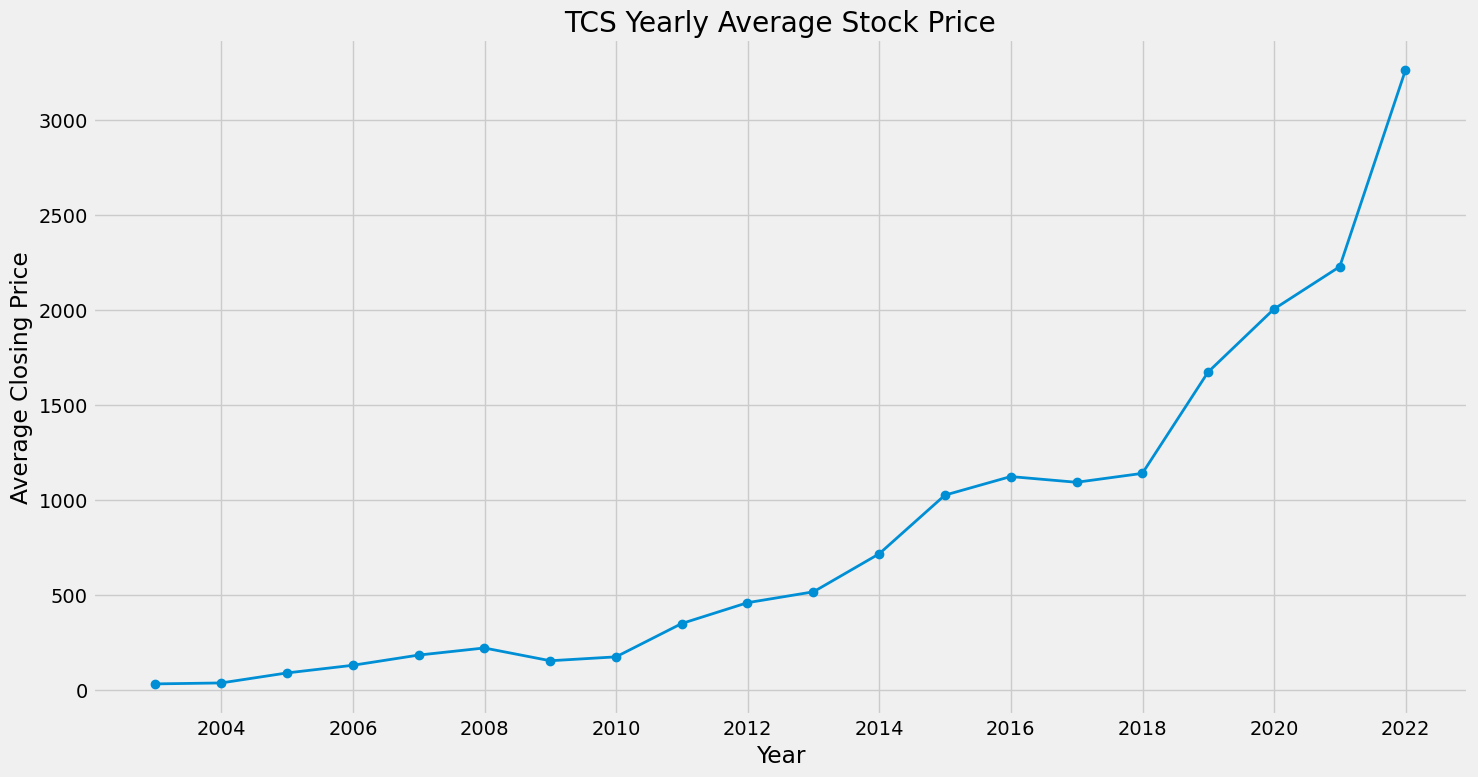

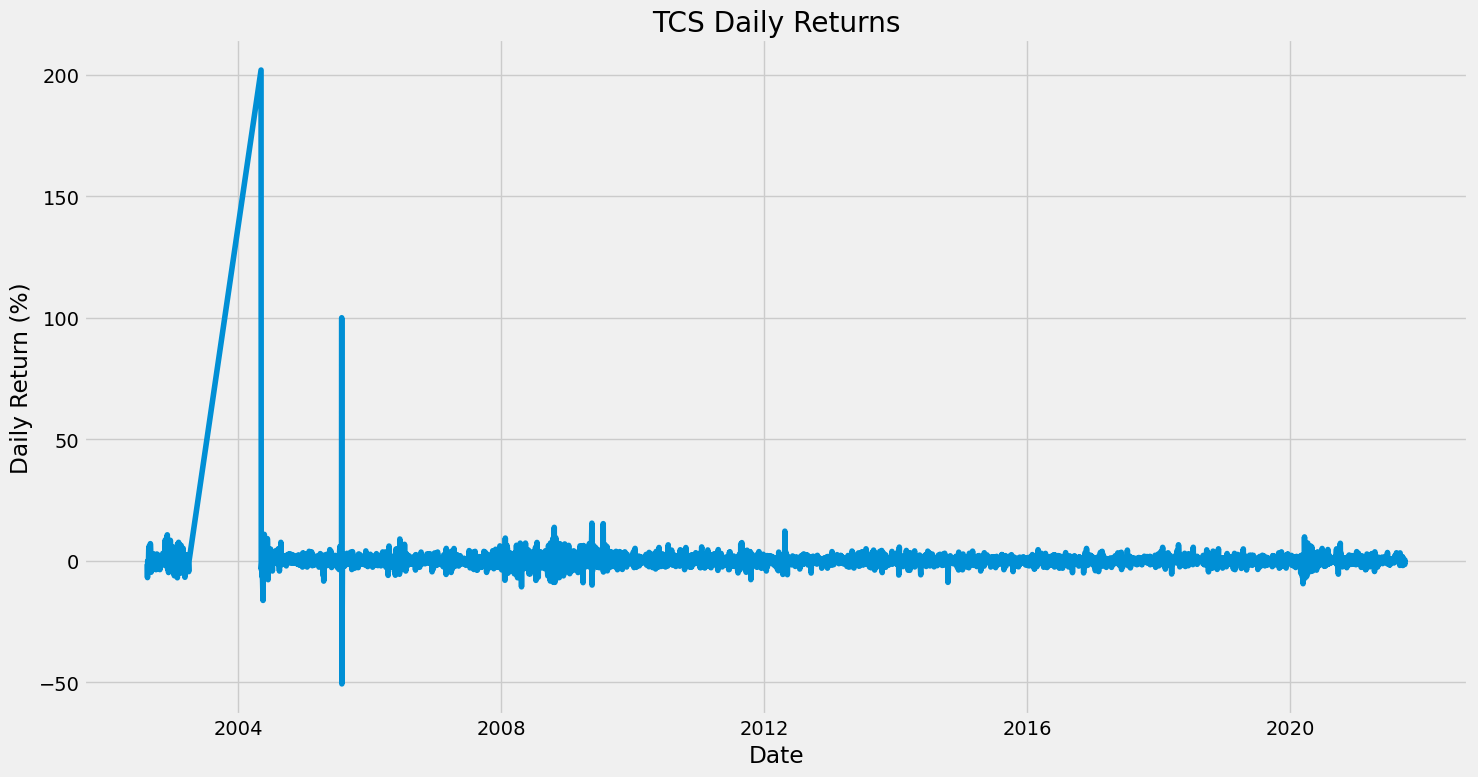

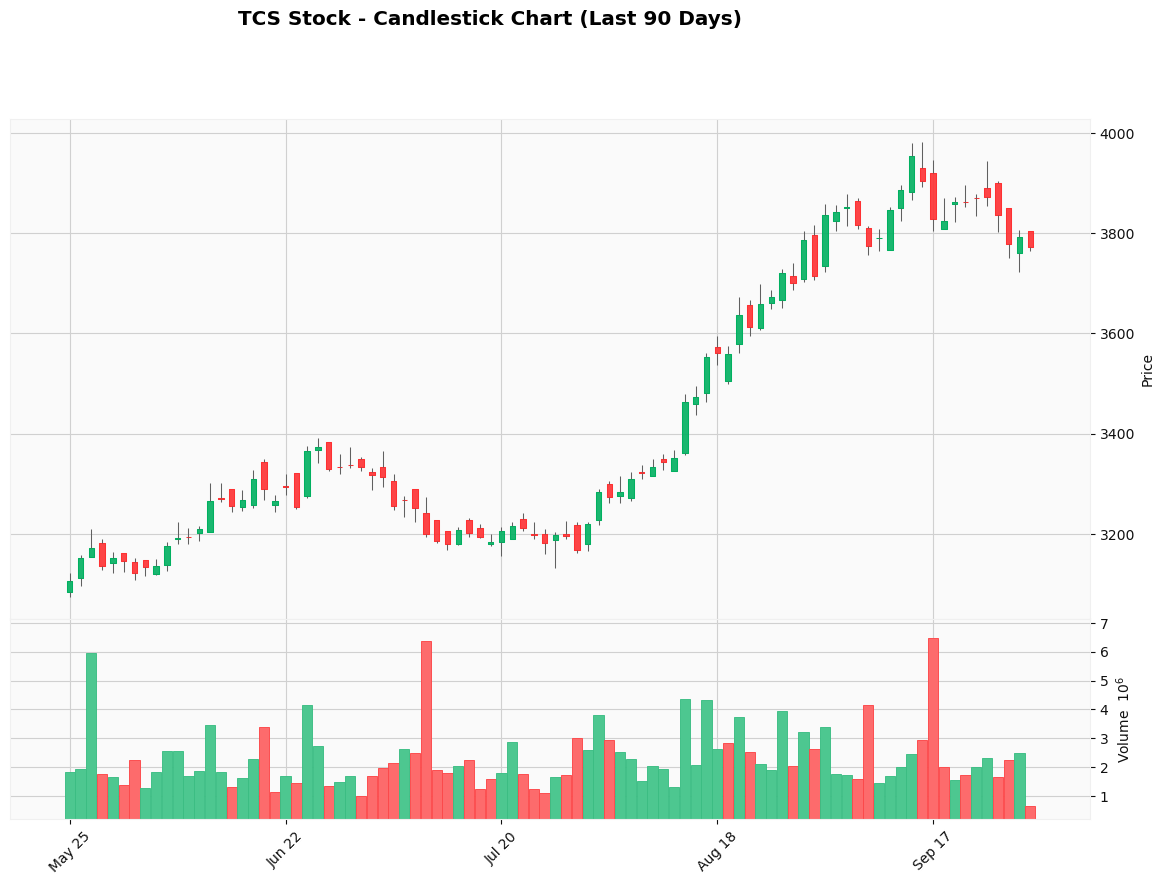

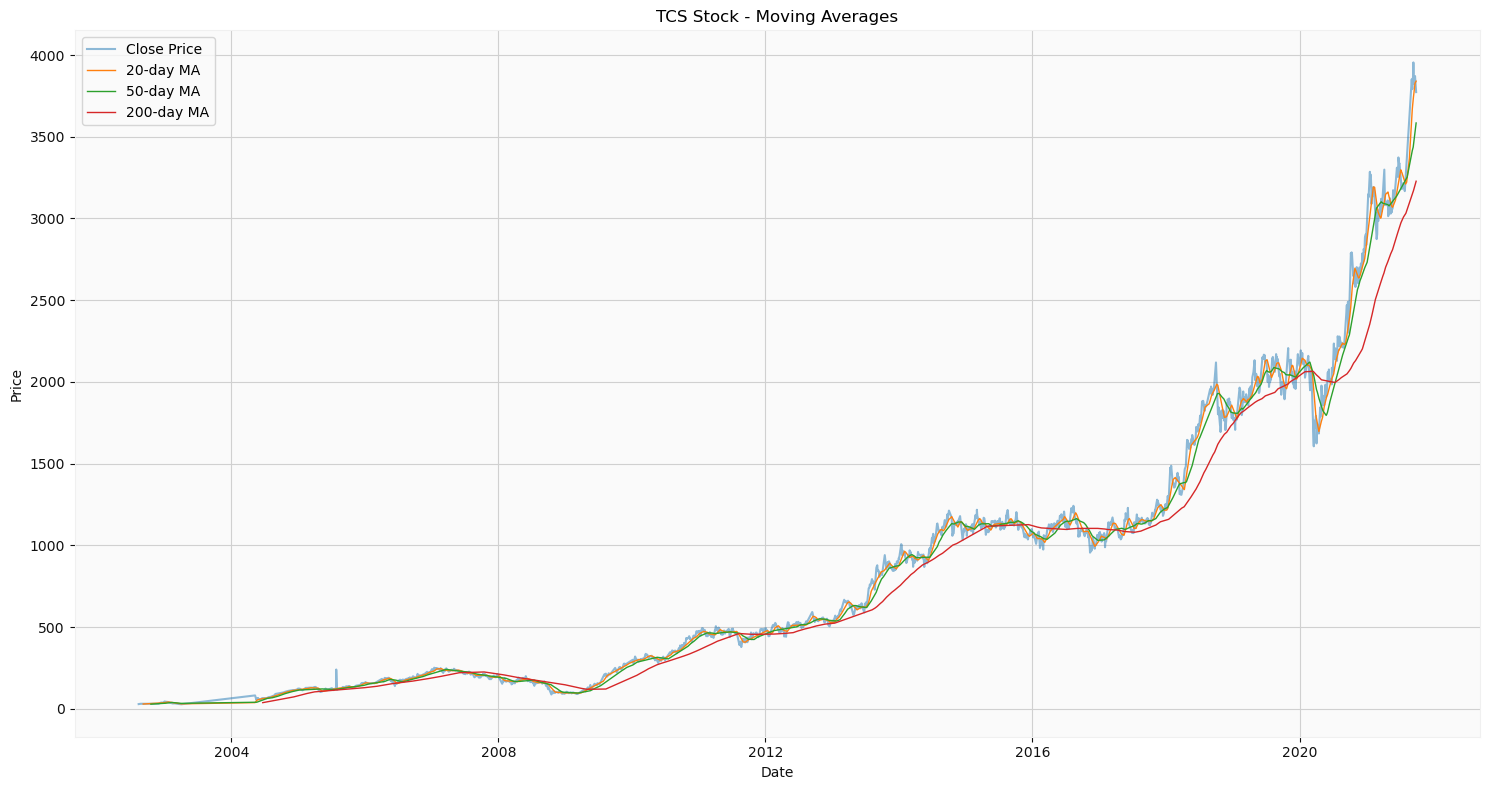

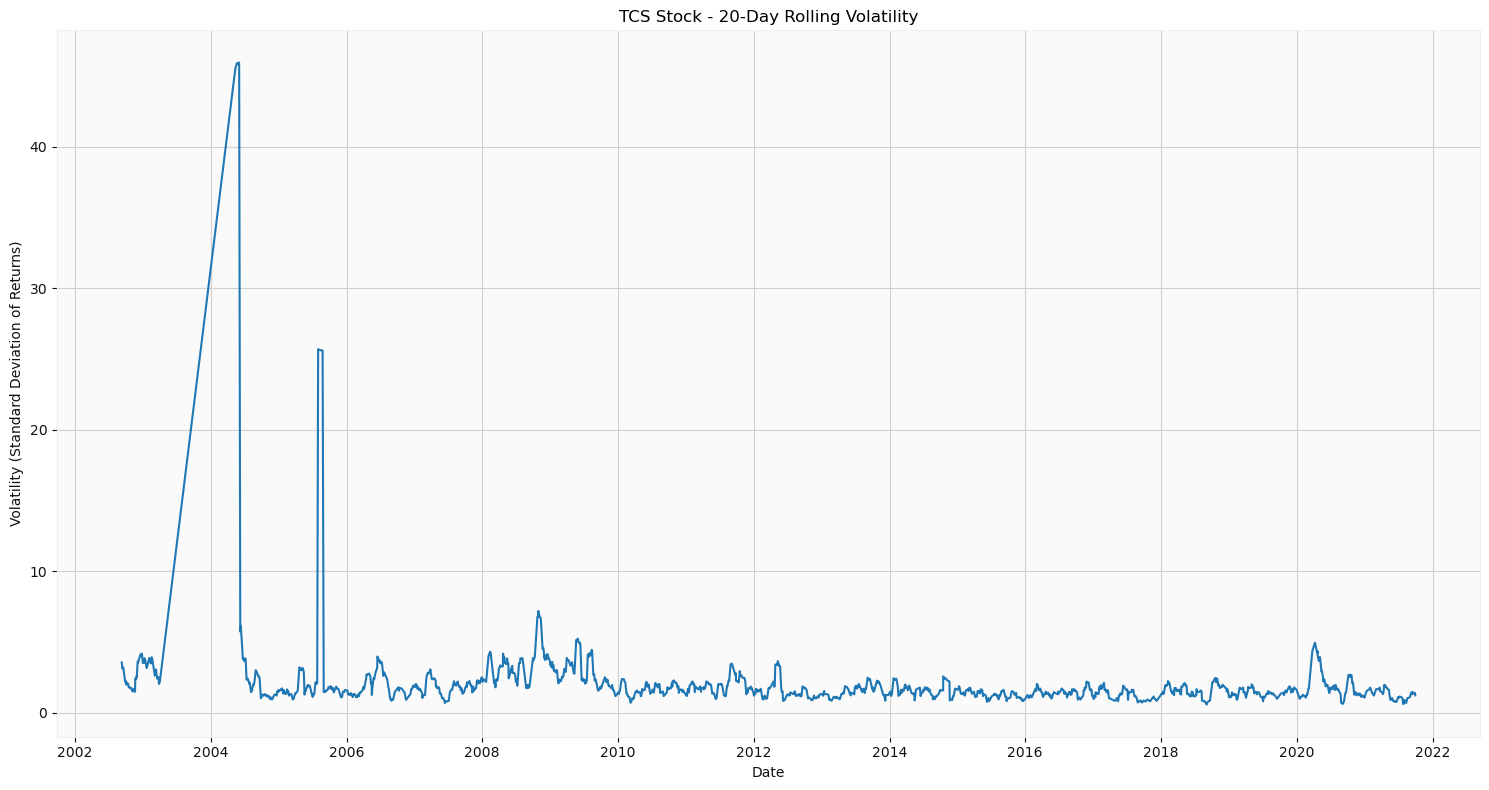

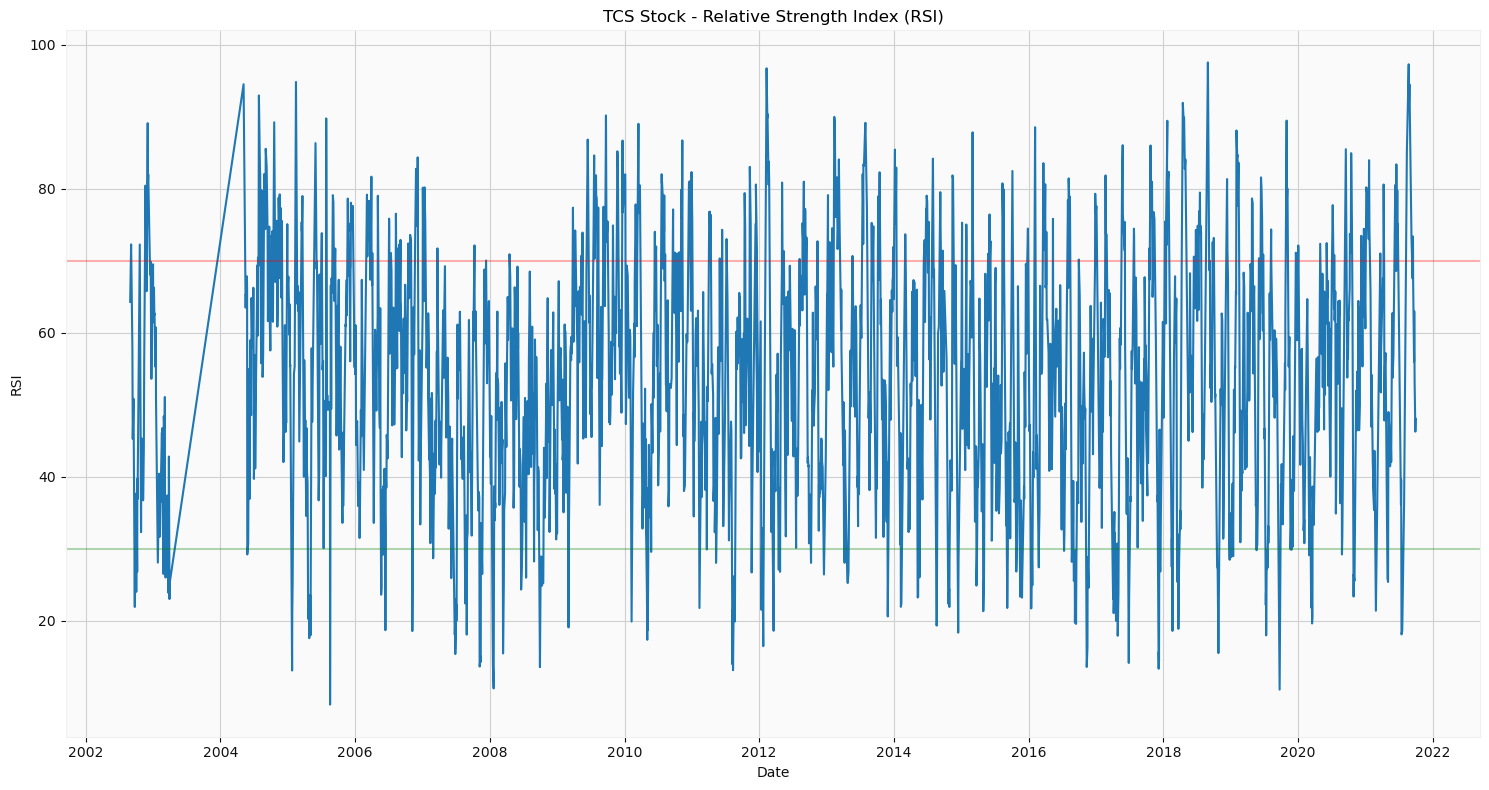

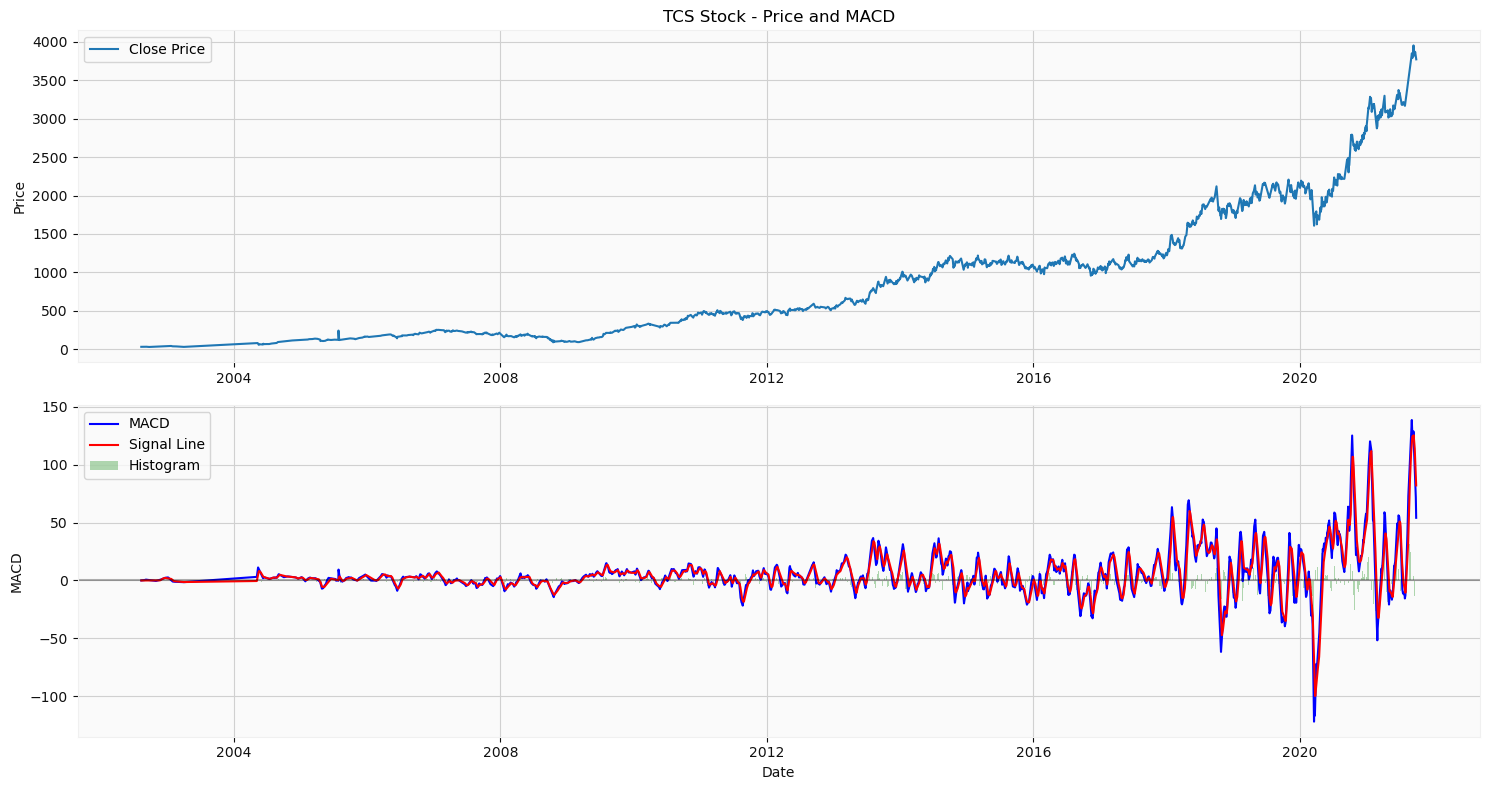

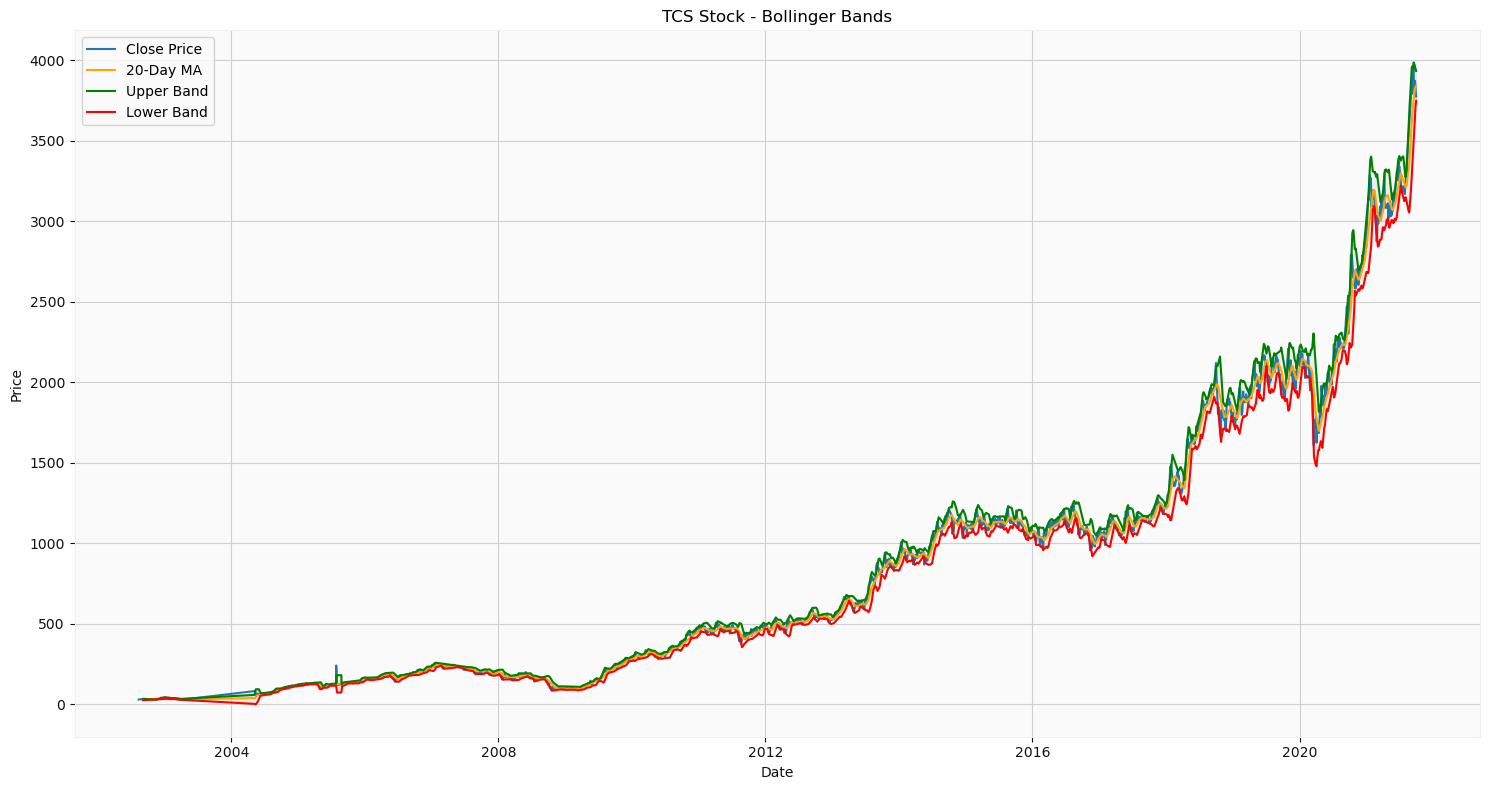

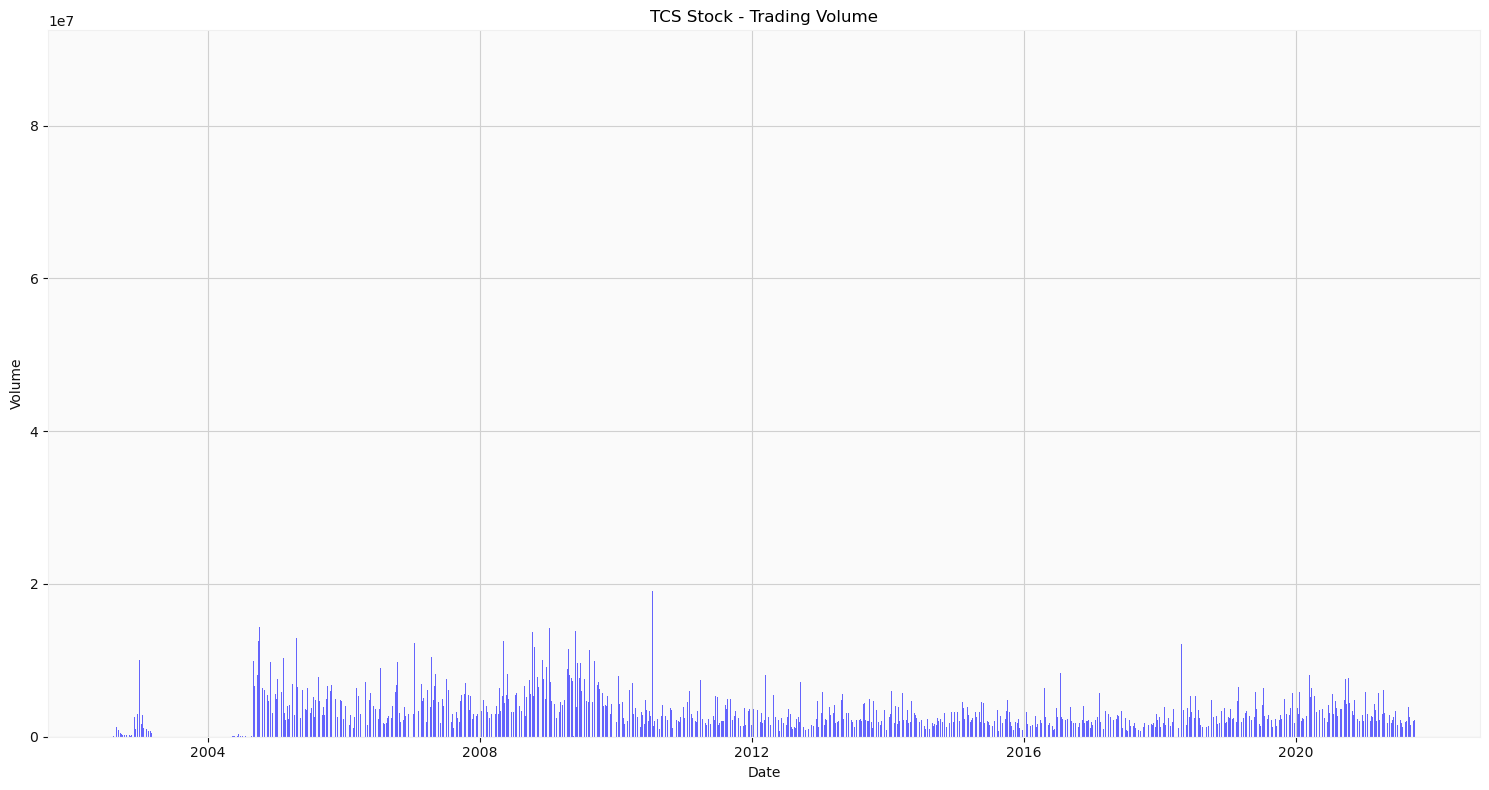

Golden Crosses (20-day MA crosses above 50-day MA):
- 2002-11-25
- 2004-05-07
- 2004-07-15
- 2005-06-10
- 2005-09-06
- 2005-11-17
- 2006-03-06
- 2006-07-20
- 2007-05-07
- 2007-10-18
- 2007-12-24
- 2008-04-17
- 2008-08-27
- 2009-02-02
- 2009-02-19
- 2009-03-30
- 2010-06-23
- 2011-04-07
- 2011-06-15
- 2011-06-24
- 2011-07-18
- 2011-10-07
- 2012-02-16
- 2012-05-11
- 2012-08-17
- 2012-12-03
- 2013-01-17
- 2013-06-07
- 2013-07-11
- 2013-12-30
- 2014-04-24
- 2014-06-19
- 2015-02-09
- 2015-06-01
- 2015-08-17
- 2015-10-13
- 2016-03-21
- 2016-08-08
- 2017-01-02
- 2017-05-26
- 2017-08-03
- 2017-10-16
- 2018-01-15
- 2018-04-20
- 2018-12-14
- 2019-02-07
- 2019-08-23
- 2019-11-08
- 2019-12-30
- 2020-05-12
- 2021-04-07
- 2021-06-11
- 2021-08-16

Death Crosses (20-day MA crosses below 50-day MA):
- 2003-02-06
- 2004-07-14
- 2005-04-20
- 2005-08-26
- 2005-11-09
- 2006-02-07
- 2006-05-31
- 2007-03-07
- 2007-06-01
- 2007-11-12
- 2008-01-21
- 2008-06-24
- 2008-09-17
- 2009-02-04
- 2009-02-27
- 2010-05-04

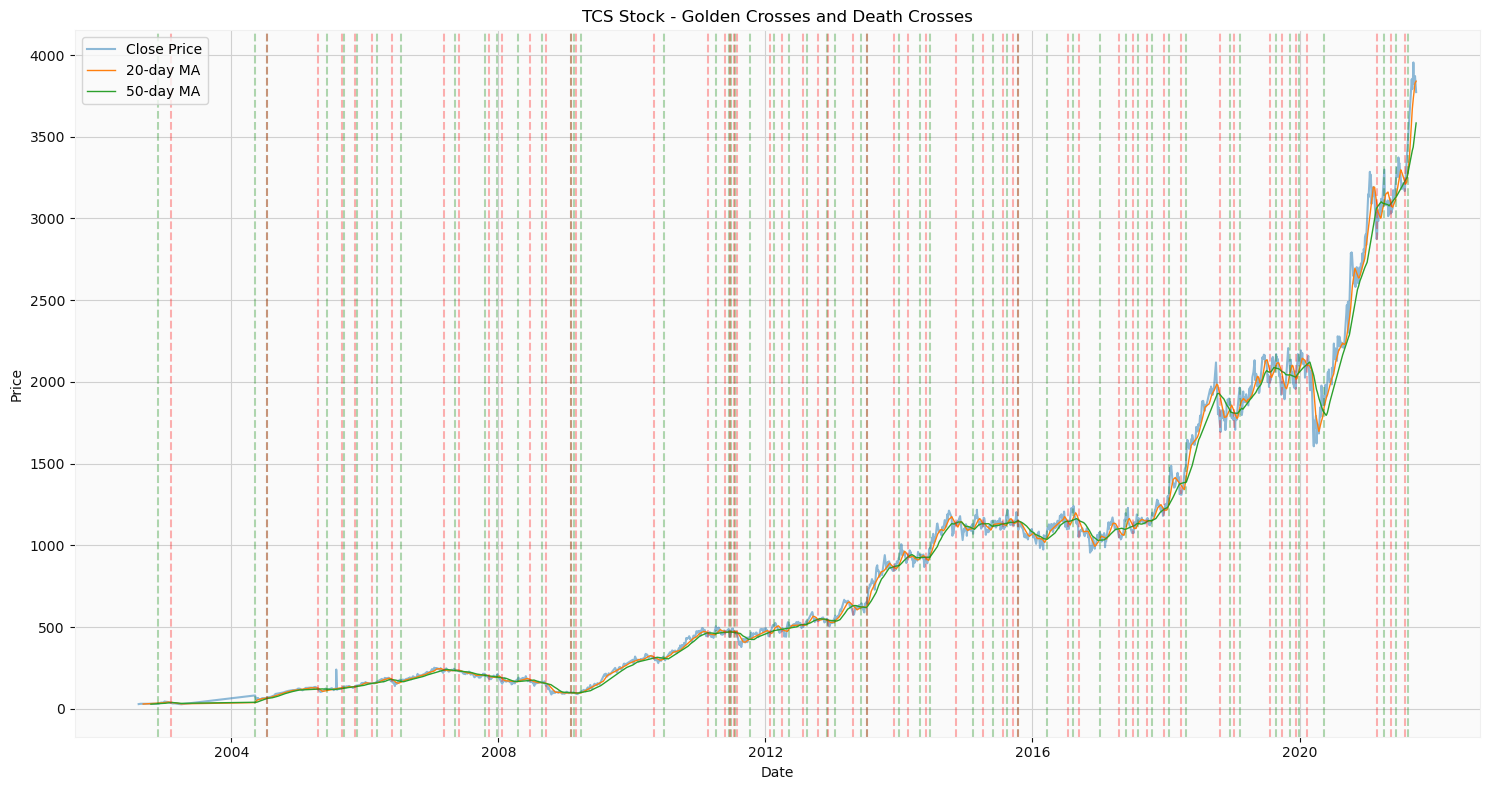

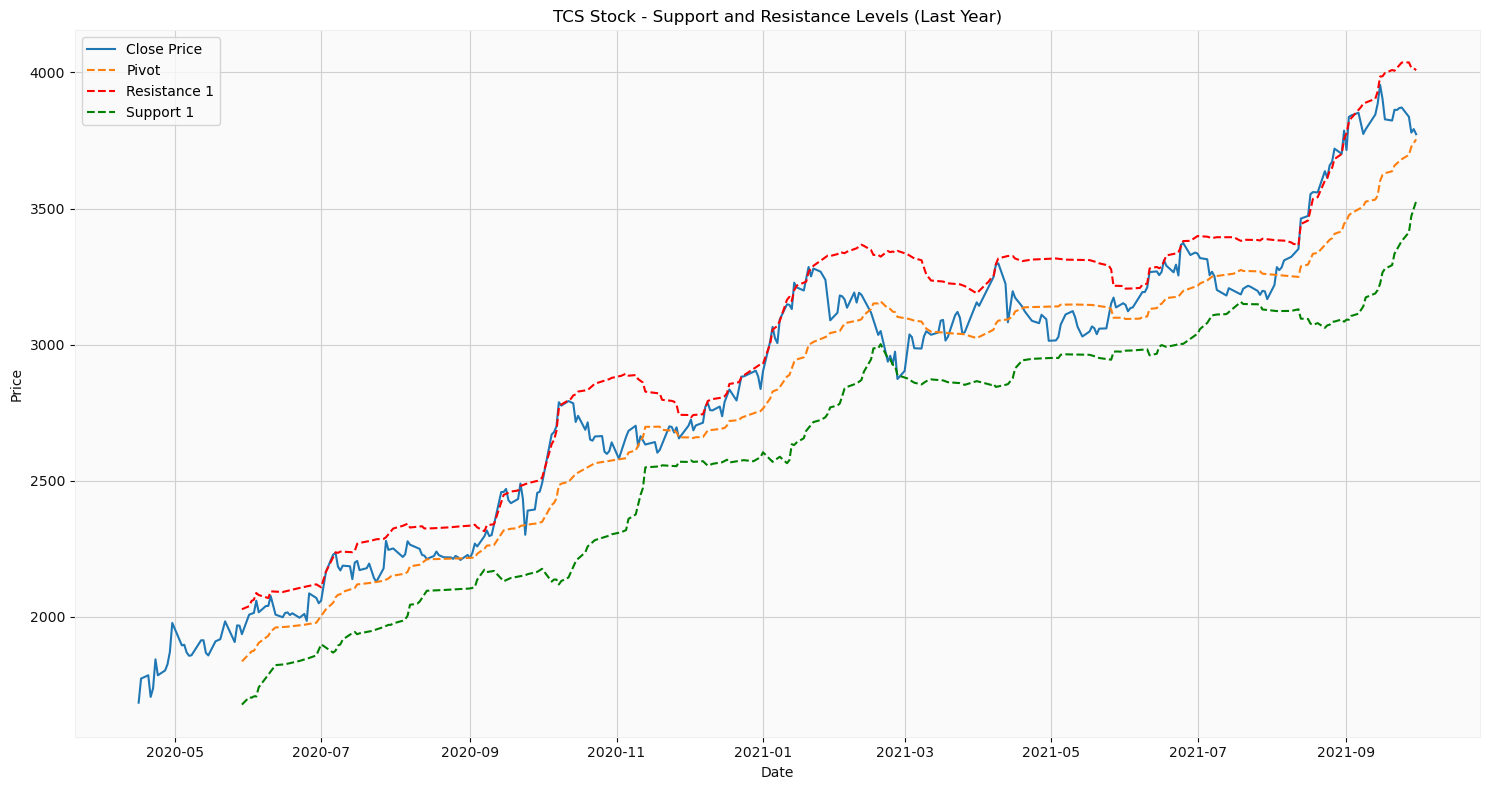

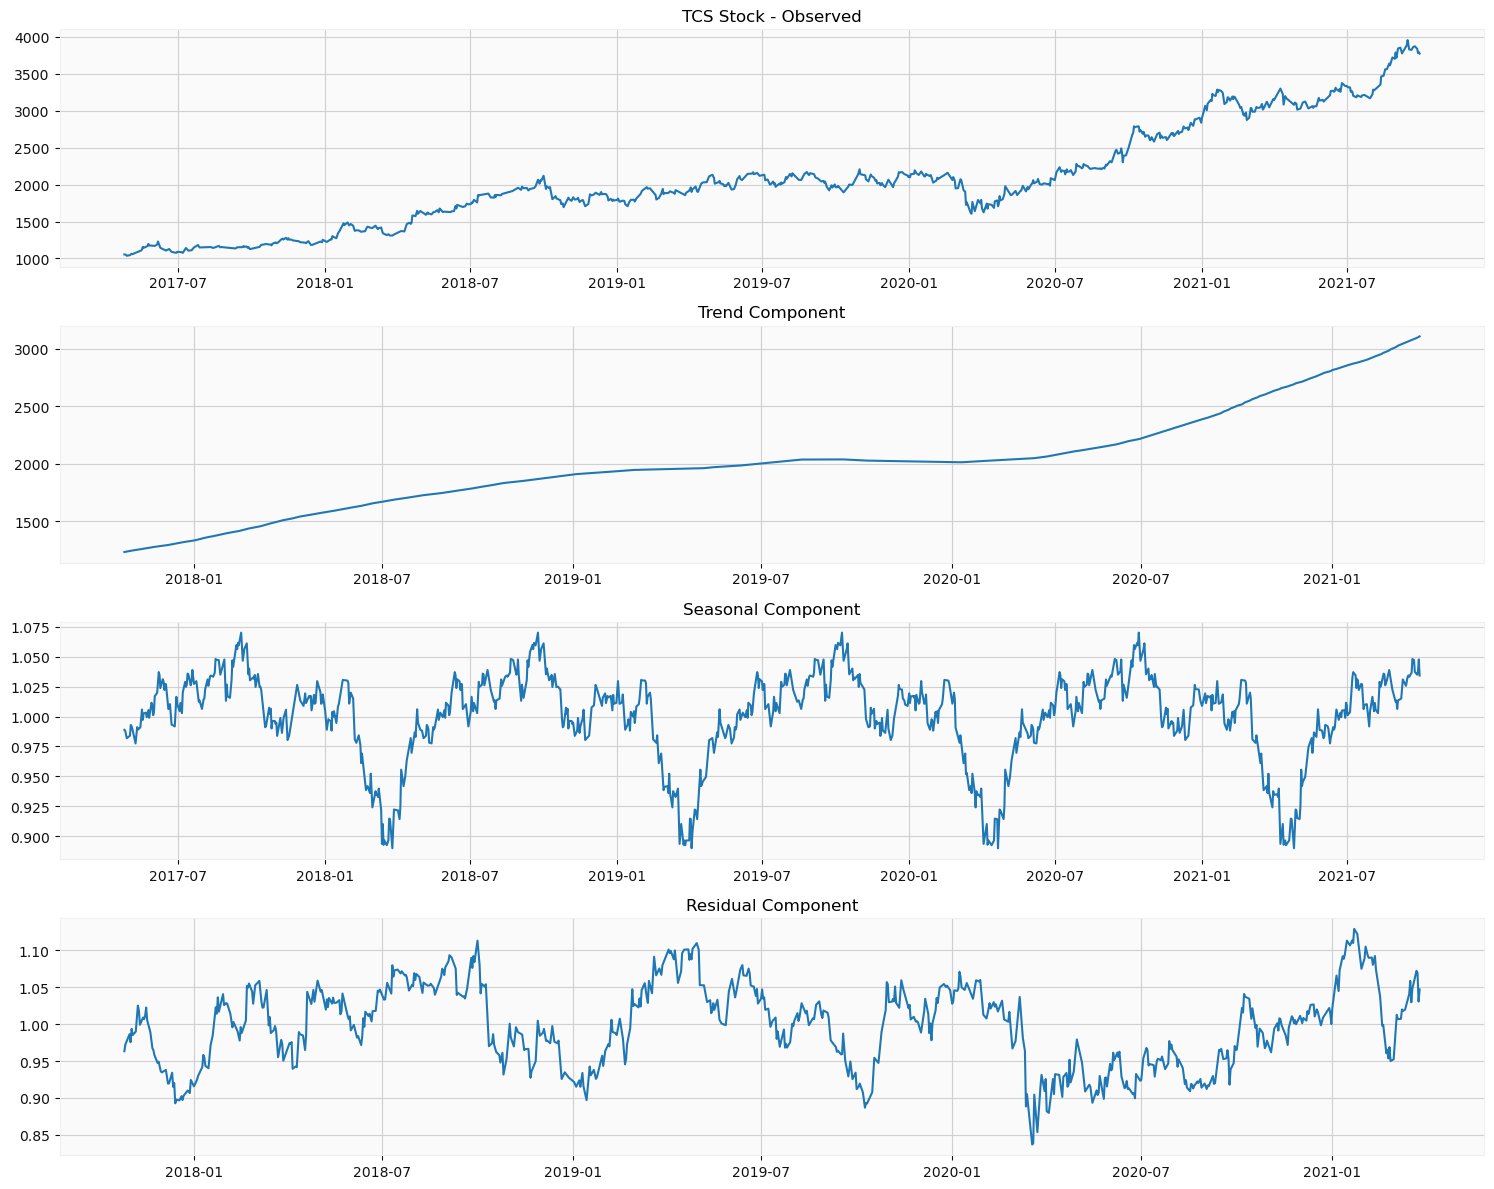

Correlation between TCS and simulated NIFTY returns: 0.9924


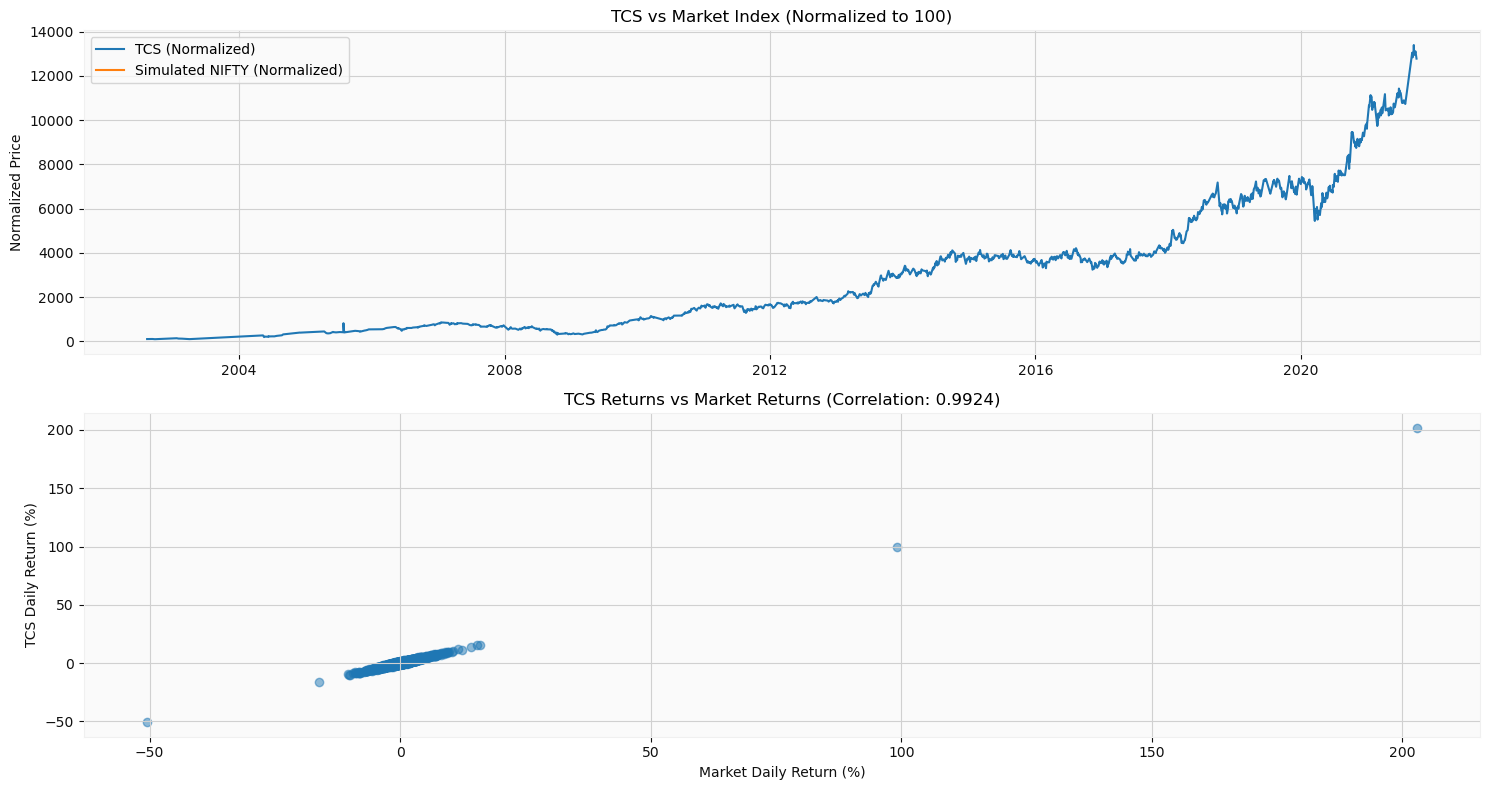

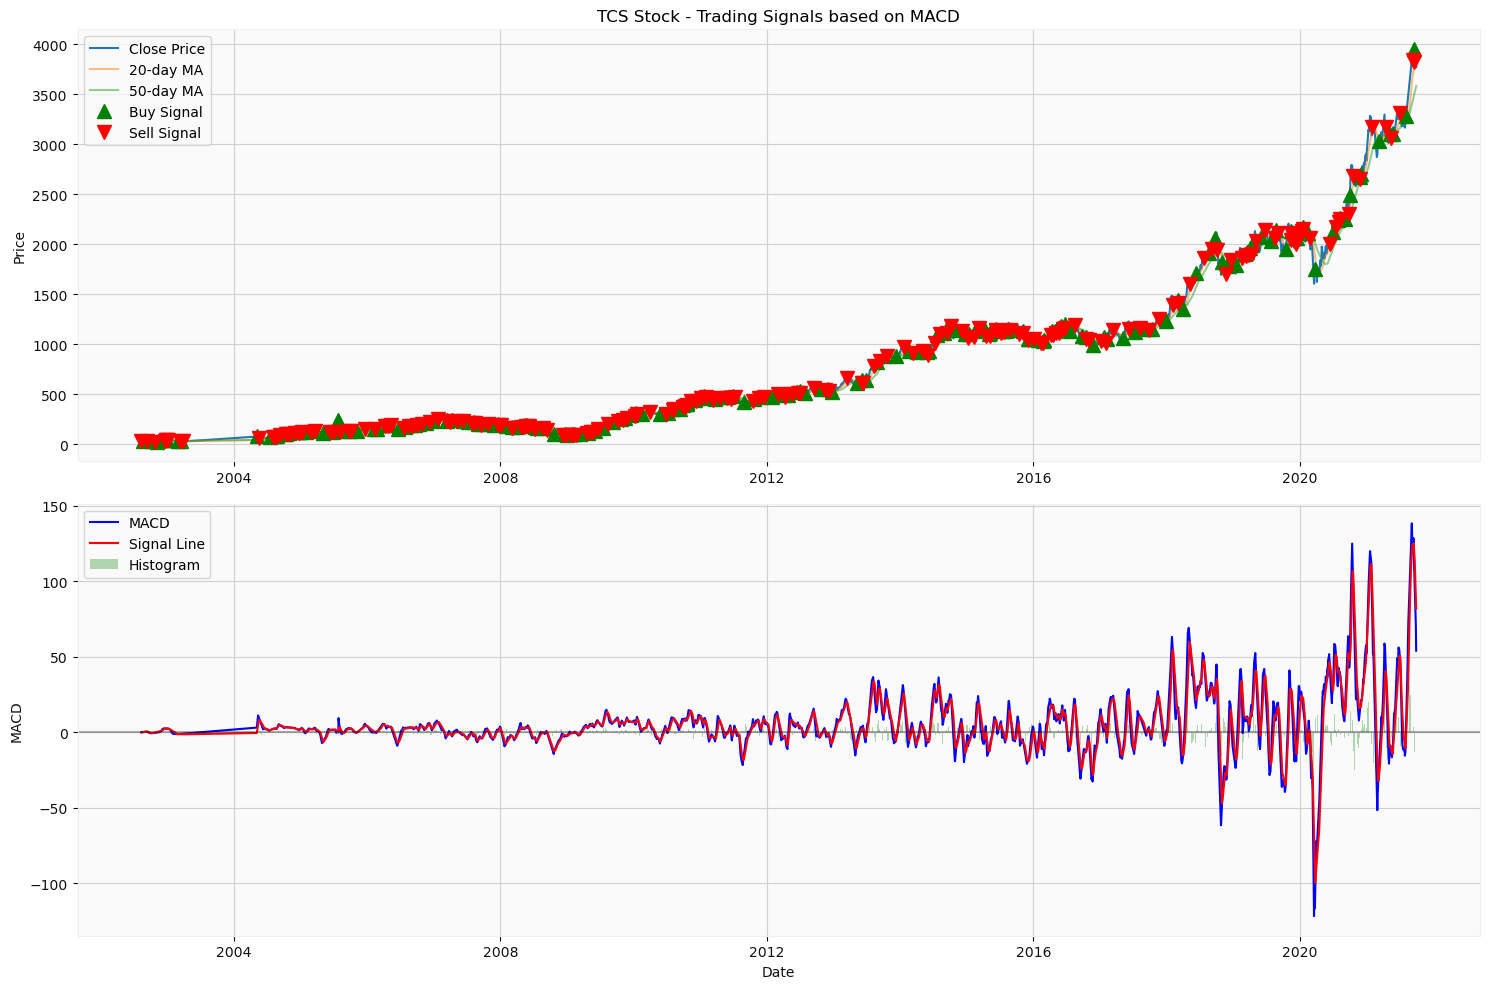

Backtest Results:
Initial Capital: $100000.00
Final Value: $156615.30
Total Return: 56.62%
Buy and Hold Return: 5664.89%
Number of Trades: 348

Sample Transactions:
2004-07-16: BUY 1431.0 shares at 69.88
2004-08-05: SELL 1431.0 shares at 73.50
2004-08-11: BUY 1330.0 shares at 79.04
2004-08-17: SELL 1330.0 shares at 76.15
2004-08-24: BUY 1183.0 shares at 85.64
...


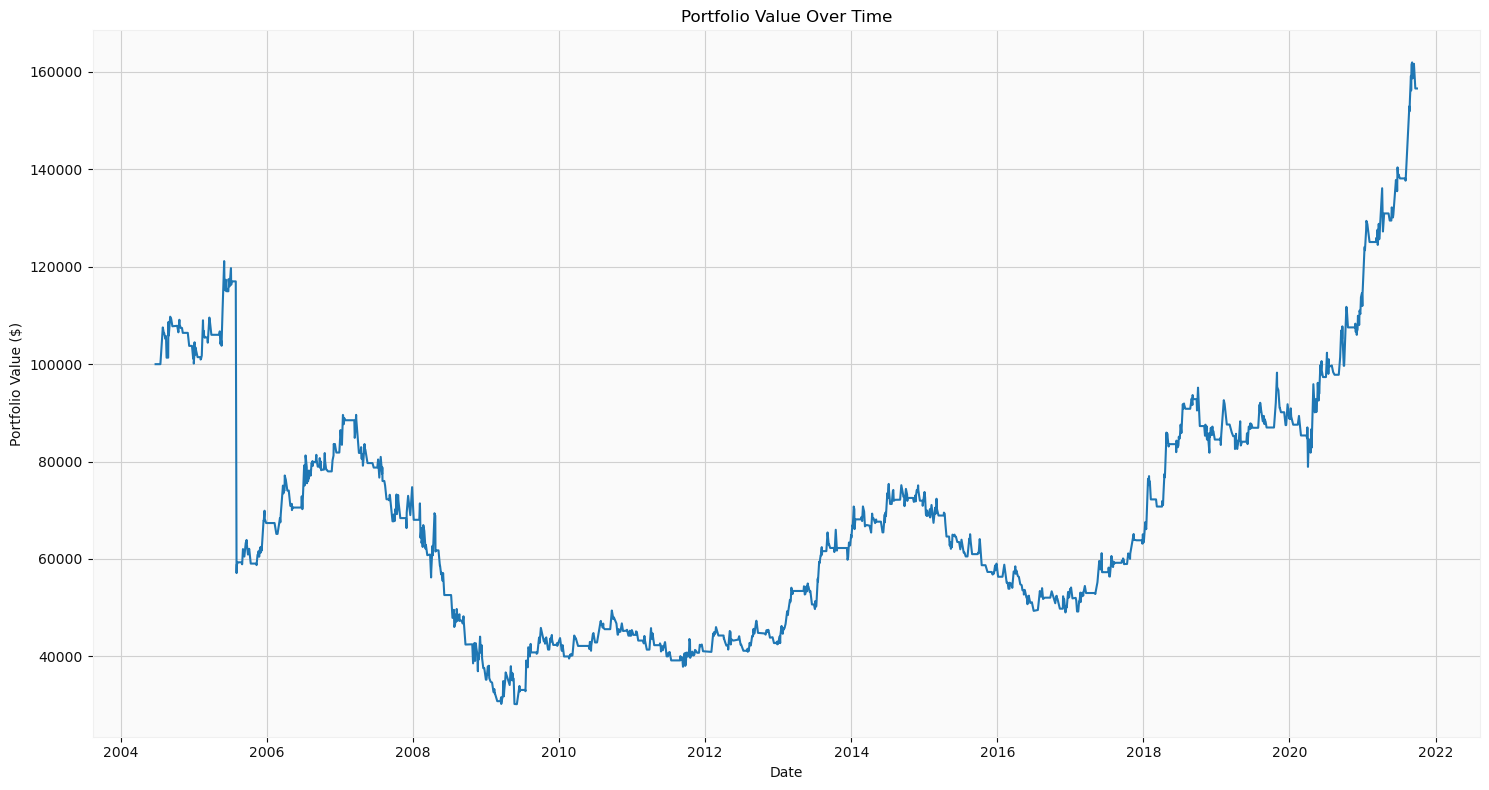


Risk Metrics:
Annualized Return: 6.08%
Annualized Volatility: 24.56%
Sharpe Ratio: 0.1915
Maximum Drawdown: -75.17%


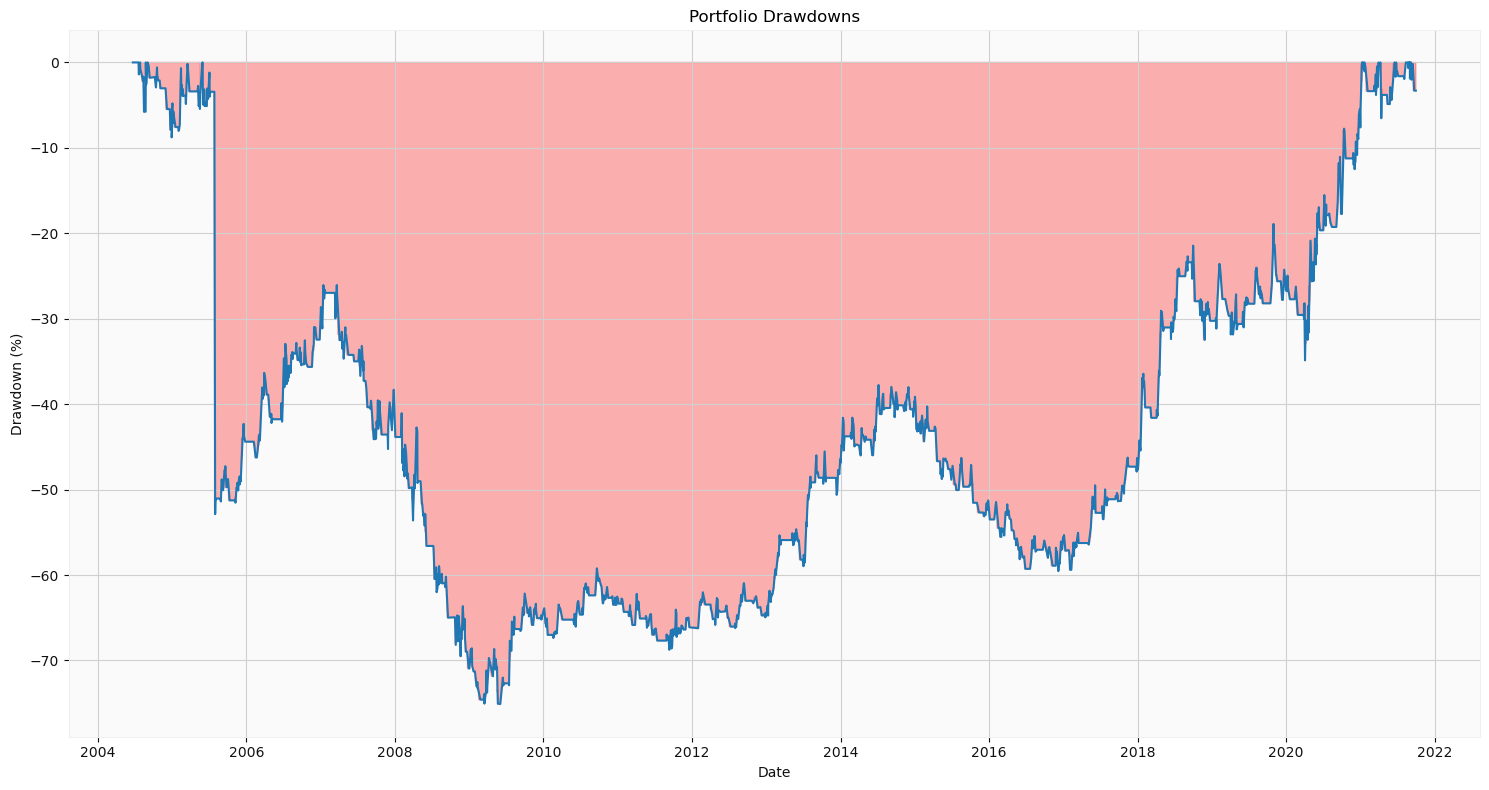


TCS Stock Technical Analysis Summary (as of 2021-09-30)
Close Price: 3773.20
20-Day Moving Average: 3839.98
50-Day Moving Average: 3584.29
200-Day Moving Average: 3227.92
RSI (14-Day): 48.05
MACD: 54.0815
MACD Signal Line: 82.0230
Bollinger Upper Band: 3932.27
Bollinger Lower Band: 3747.68
20-Day Volatility: 1.24%

Technical Indicator Signals:
MACD Signal: Bearish
RSI Signal: Neutral
Moving Average Signal: Bullish
Bollinger Bands Signal: Neutral

Overall Market Sentiment: Neutral (Score: 0.00)


In [2]:
# TCS Stock Technical Analysis Tool
# Complete Python notebook with cells for each analysis step

# Cell 1: Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['axes.grid'] = True

# Cell 2: Loading and exploring the data
# Read the CSV file
df = pd.read_csv('TCS_stock_history.csv')

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as the index
df.set_index('Date', inplace=True)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Information:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Cell 3: Data visualization - Historical price trends
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.title('TCS Stock Price History')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Yearly trend - Resampling to yearly data
yearly_data = df['Close'].resample('Y').mean()
plt.figure(figsize=(15, 8))
plt.plot(yearly_data.index, yearly_data.values, marker='o', linestyle='-', linewidth=2)
plt.title('TCS Yearly Average Stock Price')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot daily returns
df['Daily Return'] = df['Close'].pct_change() * 100
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['Daily Return'])
plt.title('TCS Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Cell 4: Candlestick chart with volume
# Create a new DataFrame for mplfinance
ohlc_data = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

# Plot candlestick for the last 90 days
mpf.plot(ohlc_data.tail(90), 
         type='candle', 
         volume=True,
         title='TCS Stock - Candlestick Chart (Last 90 Days)',
         style='yahoo',
         figsize=(15, 10))

# Cell 5: Moving Averages
# Calculate 20-day and 50-day moving averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plot the close price and the moving averages
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5)
plt.plot(df.index, df['MA20'], label='20-day MA', linewidth=1)
plt.plot(df.index, df['MA50'], label='50-day MA', linewidth=1)
plt.plot(df.index, df['MA200'], label='200-day MA', linewidth=1)
plt.title('TCS Stock - Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cell 6: Volatility Analysis
# Calculate 20-day rolling standard deviation as a measure of volatility
df['Volatility_20d'] = df['Daily Return'].rolling(window=20).std()

# Plot volatility
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['Volatility_20d'])
plt.title('TCS Stock - 20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation of Returns)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Cell 7: Relative Strength Index (RSI) - Momentum indicator
def calculate_rsi(data, window=14):
    # Calculate price changes
    delta = data.diff()
    
    # Separate gains and losses
    gain = delta.mask(delta < 0, 0)
    loss = -delta.mask(delta > 0, 0)
    
    # Calculate average gain and loss
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    # Calculate relative strength
    rs = avg_gain / avg_loss
    
    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Calculate RSI
df['RSI_14'] = calculate_rsi(df['Close'])

# Plot RSI
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['RSI_14'])
plt.axhline(y=70, color='r', linestyle='-', alpha=0.3)
plt.axhline(y=30, color='g', linestyle='-', alpha=0.3)
plt.title('TCS Stock - Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.grid(True)
plt.tight_layout()
plt.show()

# Cell 8: MACD (Moving Average Convergence Divergence)
# Calculate MACD
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']

# Plot MACD
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('TCS Stock - Price and MACD')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['Signal_Line'], label='Signal Line', color='red')
plt.bar(df.index, df['MACD_Histogram'], label='Histogram', color='green', alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.ylabel('MACD')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cell 9: Bollinger Bands
# Calculate Bollinger Bands
df['20d_MA'] = df['Close'].rolling(window=20).mean()
df['20d_STD'] = df['Close'].rolling(window=20).std()
df['Upper_Band'] = df['20d_MA'] + (df['20d_STD'] * 2)
df['Lower_Band'] = df['20d_MA'] - (df['20d_STD'] * 2)

# Plot Bollinger Bands
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['20d_MA'], label='20-Day MA', color='orange')
plt.plot(df.index, df['Upper_Band'], label='Upper Band', color='green')
plt.plot(df.index, df['Lower_Band'], label='Lower Band', color='red')
plt.fill_between(df.index, df['Upper_Band'], df['Lower_Band'], alpha=0.1, color='gray')
plt.title('TCS Stock - Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cell 10: Volume Analysis
plt.figure(figsize=(15, 8))
plt.bar(df.index, df['Volume'], color='blue', alpha=0.6)
plt.title('TCS Stock - Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

# Cell 11: Detecting Golden Cross and Death Cross
def detect_crosses(data):
    """Detect golden cross (20-day MA crosses above 50-day MA) and death cross (20-day MA crosses below 50-day MA)"""
    golden_crosses = []
    death_crosses = []
    
    # Iterate through the DataFrame starting from the point where both MAs are available
    for i in range(1, len(data)):
        # Check for golden cross
        if data['MA20'].iloc[i-1] < data['MA50'].iloc[i-1] and data['MA20'].iloc[i] > data['MA50'].iloc[i]:
            golden_crosses.append(data.index[i])
        
        # Check for death cross
        if data['MA20'].iloc[i-1] > data['MA50'].iloc[i-1] and data['MA20'].iloc[i] < data['MA50'].iloc[i]:
            death_crosses.append(data.index[i])
    
    return golden_crosses, death_crosses

# Detect crosses
golden_crosses, death_crosses = detect_crosses(df)

# Print cross information
print("Golden Crosses (20-day MA crosses above 50-day MA):")
for date in golden_crosses:
    print(f"- {date.strftime('%Y-%m-%d')}")

print("\nDeath Crosses (20-day MA crosses below 50-day MA):")
for date in death_crosses:
    print(f"- {date.strftime('%Y-%m-%d')}")

# Plot with crosses marked
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5)
plt.plot(df.index, df['MA20'], label='20-day MA', linewidth=1)
plt.plot(df.index, df['MA50'], label='50-day MA', linewidth=1)

# Mark golden crosses
for date in golden_crosses:
    plt.axvline(x=date, color='g', linestyle='--', alpha=0.3)
    
# Mark death crosses
for date in death_crosses:
    plt.axvline(x=date, color='r', linestyle='--', alpha=0.3)

plt.title('TCS Stock - Golden Crosses and Death Crosses')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cell 12: Support and Resistance Levels (using pivot points)
def calculate_pivot_points(data, window=30):
    """Calculate pivot points as potential support and resistance levels"""
    data = data.copy()
    
    # Calculate pivot points (simplified method)
    data['Pivot'] = (data['High'].rolling(window=window).max() + 
                     data['Low'].rolling(window=window).min() + 
                     data['Close'].rolling(window=window).mean()) / 3
    
    data['R1'] = 2 * data['Pivot'] - data['Low'].rolling(window=window).min()
    data['S1'] = 2 * data['Pivot'] - data['High'].rolling(window=window).max()
    
    return data

# Calculate pivot points
pivot_data = calculate_pivot_points(df.tail(365))  # Last year of data

# Plot pivot points
plt.figure(figsize=(15, 8))
plt.plot(pivot_data.index, pivot_data['Close'], label='Close Price')
plt.plot(pivot_data.index, pivot_data['Pivot'], label='Pivot', linestyle='--')
plt.plot(pivot_data.index, pivot_data['R1'], label='Resistance 1', linestyle='--', color='red')
plt.plot(pivot_data.index, pivot_data['S1'], label='Support 1', linestyle='--', color='green')
plt.title('TCS Stock - Support and Resistance Levels (Last Year)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cell 13: Seasonality Analysis
# Decompose time series to identify seasonality
# Use a subset of data for better visualization
subset = df['Close'].tail(365 * 3)  # Last 3 years of data
decomposition = seasonal_decompose(subset, model='multiplicative', period=252)  # ~252 trading days in a year

# Plot decomposition
plt.figure(figsize=(15, 12))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed)
plt.title('TCS Stock - Observed')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Trend Component')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Residual Component')
plt.grid(True)

plt.tight_layout()
plt.show()

# Cell 14: Correlation Analysis with Market Index (assuming we have NIFTY data)
# This is a placeholder - in a real scenario, you would load market index data
# Since we don't have that data, we'll simulate it for demonstration purposes
# Create a simulated NIFTY index based on TCS with some random variation
np.random.seed(42)
nifty_returns = df['Daily Return'] + np.random.normal(0, 1, len(df)) * 0.5
nifty_price = 1000 * (1 + nifty_returns / 100).cumprod()

# Calculate the correlation
correlation = df['Daily Return'].corr(nifty_returns)
print(f"Correlation between TCS and simulated NIFTY returns: {correlation:.4f}")

# Plot TCS vs simulated NIFTY
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'] / df['Close'].iloc[0] * 100, label='TCS (Normalized)')
plt.plot(df.index, nifty_price / nifty_price[0] * 100, label='Simulated NIFTY (Normalized)')
plt.title('TCS vs Market Index (Normalized to 100)')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.scatter(nifty_returns, df['Daily Return'], alpha=0.5)
plt.title(f'TCS Returns vs Market Returns (Correlation: {correlation:.4f})')
plt.xlabel('Market Daily Return (%)')
plt.ylabel('TCS Daily Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Cell 15: Trading Signals based on technical indicators
# Generate buy/sell signals based on MACD crossing signal line
df['Signal'] = 0  # 0: no signal, 1: buy, -1: sell

# Buy signal: MACD crosses above signal line
df.loc[(df['MACD'] > df['Signal_Line']) & (df['MACD'].shift(1) <= df['Signal_Line'].shift(1)), 'Signal'] = 1

# Sell signal: MACD crosses below signal line
df.loc[(df['MACD'] < df['Signal_Line']) & (df['MACD'].shift(1) >= df['Signal_Line'].shift(1)), 'Signal'] = -1

# Plot signals on price chart
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['MA20'], label='20-day MA', alpha=0.5)
plt.plot(df.index, df['MA50'], label='50-day MA', alpha=0.5)

# Mark buy signals
plt.plot(df[df['Signal'] == 1].index, df[df['Signal'] == 1]['Close'], '^', markersize=10, color='g', label='Buy Signal')

# Mark sell signals
plt.plot(df[df['Signal'] == -1].index, df[df['Signal'] == -1]['Close'], 'v', markersize=10, color='r', label='Sell Signal')

plt.title('TCS Stock - Trading Signals based on MACD')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['Signal_Line'], label='Signal Line', color='red')
plt.bar(df.index, df['MACD_Histogram'], label='Histogram', color='green', alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.ylabel('MACD')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cell 16: Backtesting a Simple Strategy
def backtest_strategy(data):
    """Backtest a simple MACD-based strategy"""
    data = data.copy()
    
    # Initial capital
    initial_capital = 100000
    position = 0  # 0: no position, 1: holding stock
    cash = initial_capital
    stock = 0
    transactions = []
    
    # Track portfolio value
    portfolio_values = []
    
    for i in range(1, len(data)):
        date = data.index[i]
        current_price = data['Close'].iloc[i]
        signal = data['Signal'].iloc[i]
        
        # Execute trades based on signals
        if signal == 1 and position == 0:  # Buy signal and no position
            shares_to_buy = cash // current_price
            cash -= shares_to_buy * current_price
            stock += shares_to_buy
            position = 1
            transactions.append(f"{date.strftime('%Y-%m-%d')}: BUY {shares_to_buy} shares at {current_price:.2f}")
        
        elif signal == -1 and position == 1:  # Sell signal and holding position
            cash += stock * current_price
            transactions.append(f"{date.strftime('%Y-%m-%d')}: SELL {stock} shares at {current_price:.2f}")
            stock = 0
            position = 0
        
        # Calculate portfolio value
        portfolio_value = cash + (stock * current_price)
        portfolio_values.append(portfolio_value)
    
    # Calculate final performance
    final_value = cash + (stock * data['Close'].iloc[-1])
    total_return = (final_value - initial_capital) / initial_capital * 100
    
    # Calculate buy and hold return
    buy_hold_return = (data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0] * 100
    
    return {
        'Initial Capital': initial_capital,
        'Final Value': final_value,
        'Total Return': total_return,
        'Buy and Hold Return': buy_hold_return,
        'Number of Trades': len(transactions),
        'Transactions': transactions,
        'Portfolio Values': portfolio_values
    }

# Run backtest
backtest_results = backtest_strategy(df.dropna())

# Print backtest results
print("Backtest Results:")
print(f"Initial Capital: ${backtest_results['Initial Capital']:.2f}")
print(f"Final Value: ${backtest_results['Final Value']:.2f}")
print(f"Total Return: {backtest_results['Total Return']:.2f}%")
print(f"Buy and Hold Return: {backtest_results['Buy and Hold Return']:.2f}%")
print(f"Number of Trades: {backtest_results['Number of Trades']}")
print("\nSample Transactions:")
for i, transaction in enumerate(backtest_results['Transactions'][:5]):
    print(transaction)
if len(backtest_results['Transactions']) > 5:
    print("...")

# Plot portfolio value over time
plt.figure(figsize=(15, 8))
plt.plot(df.index[-len(backtest_results['Portfolio Values']):], backtest_results['Portfolio Values'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Cell 17: Risk Analysis and Sharpe Ratio
# Calculate daily returns of the strategy
portfolio_returns = np.diff(backtest_results['Portfolio Values']) / backtest_results['Portfolio Values'][:-1] * 100

# Calculate Sharpe ratio (assuming risk-free rate of 2% annually, or about 0.0055% daily)
risk_free_rate = 2.0 / 365  # Daily risk-free rate
sharpe_ratio = (np.mean(portfolio_returns) - risk_free_rate) / np.std(portfolio_returns) * np.sqrt(252)  # Annualized

# Calculate maximum drawdown
portfolio_values = np.array(backtest_results['Portfolio Values'])
cumulative_max = np.maximum.accumulate(portfolio_values)
drawdowns = (portfolio_values - cumulative_max) / cumulative_max * 100
max_drawdown = np.min(drawdowns)

# Print risk metrics
print("\nRisk Metrics:")
print(f"Annualized Return: {np.mean(portfolio_returns) * 252:.2f}%")
print(f"Annualized Volatility: {np.std(portfolio_returns) * np.sqrt(252):.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.2f}%")

# Plot drawdowns
plt.figure(figsize=(15, 8))
plt.plot(df.index[-len(drawdowns):], drawdowns)
plt.fill_between(df.index[-len(drawdowns):], drawdowns, 0, where=(drawdowns < 0), color='red', alpha=0.3)
plt.title('Portfolio Drawdowns')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Cell 18: Summary and Analysis Dashboard
# Create a summary of key technical indicators for the most recent data point
latest_data = df.iloc[-1]
latest_date = df.index[-1]

print(f"\nTCS Stock Technical Analysis Summary (as of {latest_date.strftime('%Y-%m-%d')})")
print("=" * 50)
print(f"Close Price: {latest_data['Close']:.2f}")
print(f"20-Day Moving Average: {latest_data['MA20']:.2f}")
print(f"50-Day Moving Average: {latest_data['MA50']:.2f}")
print(f"200-Day Moving Average: {latest_data['MA200']:.2f}")
print(f"RSI (14-Day): {latest_data['RSI_14']:.2f}")
print(f"MACD: {latest_data['MACD']:.4f}")
print(f"MACD Signal Line: {latest_data['Signal_Line']:.4f}")
print(f"Bollinger Upper Band: {latest_data['Upper_Band']:.2f}")
print(f"Bollinger Lower Band: {latest_data['Lower_Band']:.2f}")
print(f"20-Day Volatility: {latest_data['Volatility_20d']:.2f}%")
print("=" * 50)

# Technical Analysis Interpretation
macd_interpretation = "Bullish" if latest_data['MACD'] > latest_data['Signal_Line'] else "Bearish"
rsi_interpretation = "Overbought" if latest_data['RSI_14'] > 70 else "Oversold" if latest_data['RSI_14'] < 30 else "Neutral"
ma_interpretation = "Bullish" if latest_data['MA20'] > latest_data['MA50'] else "Bearish"
bb_interpretation = "Overbought" if latest_data['Close'] > latest_data['Upper_Band'] else "Oversold" if latest_data['Close'] < latest_data['Lower_Band'] else "Neutral"

print("\nTechnical Indicator Signals:")
print(f"MACD Signal: {macd_interpretation}")
print(f"RSI Signal: {rsi_interpretation}")
print(f"Moving Average Signal: {ma_interpretation}")
print(f"Bollinger Bands Signal: {bb_interpretation}")

# Overall Market Sentiment
signals = [
    1 if macd_interpretation == "Bullish" else -1,
    1 if rsi_interpretation == "Overbought" else -1 if rsi_interpretation == "Oversold" else 0,
    1 if ma_interpretation == "Bullish" else -1,
    1 if bb_interpretation == "Overbought" else -1 if bb_interpretation == "Oversold" else 0
]

sentiment_score = sum(signals) / len(signals)
overall_sentiment = "Bullish" if sentiment_score > 0.3 else "Bearish" if sentiment_score < -0.3 else "Neutral"

print(f"\nOverall Market Sentiment: {overall_sentiment} (Score: {sentiment_score:.2f})")